In [1]:
using LinearAlgebra, IterativeSolvers, Statistics, Graphs, GraphIO, GraphPlot, SparseArrays

function get_levels(A)
    
    #A= convert(Array{Float64}, A)
    A= convert(SparseMatrixCSC{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    h= bicgstabl(Lambda, v, 2)
    #h=  lsmr(Lambda, v)   
    #h= Lambda \ v   
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [2]:
using SparseArrays
function calc_troph_incoh(A)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        
    end
    
    F= F/sum(A)
    
end
    
    

calc_troph_incoh (generic function with 1 method)

In [3]:
using SpecialFunctions
 





fitness= zeros(0)

h=zeros(0)
diffs= zeros(0)

A= zeros(0,0)

#stop = 5


#f=open("net_celegans_neural.dat")
#net_moreno_highschool.dat
#Ythan96.dat
#el_verde.dat


#higgs-social_network.edgelist
#web-Stanford.txt
#wiki-Talk.txt
#amazon0312.txt
#g = loadgraph("cit-HepPh.txt", "SimpleDiGraph", EdgeListFormat())
#g= path_digraph(1000)  
#g= erdos_renyi(30000, 5*30000, is_directed=true)
#add_edge!(g, 2, 1 )
#add_edge!(g, 1000, 999 )

#g =watts_strogatz(1000, 5, 0.95, is_directed = true)

#Names csphd.xml, Ragusan.xml

#Or in Pajek format CSphd.net, phdYear.clu

#g= barabasi_albert(100, (10), 3, is_directed=true )

#barabasi_albert!(g, 1000, 20) 

#g = loadgraph("CSphd.net", NETFormat())
#CS networks is very disconnected 
#using EzXML
#g = loadgraph("csphd.xml","SimpleDiGraph", GMLFormat())
using CSV
using DataFrames



#N=nv(g)    
#A = (adjacency_matrix(g))
#print(A)    
#L=sum(A)
    

data = CSV.read("Ragusan.txt", DataFrame)



    
#Fixing data error where one gender and id are mixed which lead to missing edge.
#One person had a id in the wrong column which lead to 9313 edges as the edges to here children were missing but this fixe leads to correct edge number 

data[1009,"id"]= "@I1138@"
data[1009,"mother"]= "123"
data[1009,"birth"]= -1


┌ Warning: thread = 1 warning: parsed expected 8 columns, but didn't reach end of line around data row: 1009. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:587
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1010. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1011. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1012. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1013. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1014. Filling remaining co

┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1051. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1052. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1053. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1054. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1055. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1056. Filling remaining columns with `missing`
└ @ CSV ~/.julia/pac

┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1095. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1096. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1097. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1098. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1099. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1100. Filling remaining columns with `missing`
└ @ CSV ~/.julia/pac

-1

In [4]:
N = nrow(data)

G= DiGraph(N)
#print(N)

ids= data[:, :id]

mother_id= data[:, :mother]

father_id= data[:, :father]

birth= data[:, :birth]

death= data[:, :death]

#add time differences at the point of construction

time_diff =[]

death_diff =[]

child_list=[]

parent_list=[]

test_count=0

for i in 1:N
    
    if mother_id[i] === missing
        #println(mother_id[i])
        #mother_values=[]
        else 
    
    #mother_values = indexin( mother_id[i], ids )
   (mother_values= ( findall( x -> x == mother_id[i], ids )))
        
    #if mother_values== []
    #    println("empty")
     #   println(mother_id[i])
    #    println(i)
     #   end
    test_count = test_count + 1
    if mother_values !=[]
    add_edge!(G, mother_values[1], i)
    println(i)
    append!(parent_list,mother_values[1])
    append!(child_list,i)
    #test_count = test_count + 1
         if birth[i]>0
                if birth[mother_values[1]]>0 
                    #Checking for errors in data
                    if birth[i]- birth[mother_values[1]]>10 && birth[i]- birth[mother_values[1]]<120
                append!(time_diff,birth[i]- birth[mother_values[1]] )
                    end
                end
                end 
            
             if death[i]>1000
                if death[mother_values[1]]>1000 
                    #Checking for errors in data
                    if death[i]- death[mother_values[1]]<120
                append!(death_diff,death[i]- death[mother_values[1]] )
                    end
                end
                end 
            
    end
    #add_edge!(G, father_values, i)
    end
    
    
    if father_id[i] === missing
        #println(mother_id[i])
        else 
    
    #mother_values = indexin( mother_id[i], ids )
   (father_values= ( findall( x -> x == father_id[i], ids )))
    #test_count = test_count + 1
    #println(mother_values[1])
        
    if father_values !=[]
    test_count = test_count + 1
    add_edge!(G, father_values[1], i)
    append!(parent_list,father_values[1])
    append!(child_list,i)
            #print( [father_values[1], i])
            
             if birth[i]>0
                if birth[father_values[1]]>0
                    #Checking for errors in data
                    if birth[i]- birth[father_values[1]]>10 && birth[i]- birth[father_values[1]]<120
                append!(time_diff,birth[i]- birth[father_values[1]] )
            end
                end 
            end
            
            if death[i]>1000
                if death[father_values[1]]>1000 
                    #Checking for errors in data
                    if death[i]- death[father_values[1]]<120
                append!(death_diff,death[i]- death[father_values[1]] )
                    end
                end
                end 
            
            
    end
    #add_edge!(G, father_values, i)
    end
    
    
    
    
    
    end 

G

3
4
5
6
7
9
10
11
12
15
17
18
19
20
21
22
23
24
26
28
29
30
31
33
34
36
38
40
42
46
47
49
50
51
52
53
55
56
58
60
61
62
63
64
65
67
68
69
70
71
72
73
74
75
77
79
81
83
84
86
88
89
90
91
92
93
94
95
96
97
101
102
103
106
108
109
110
113
115
116
118
119
120
121
123
126
128
129
130
131
133
135
138
139
141
143
144
146
148
149
151
152
153
154
156
158
159
160
161
171
172
173
174
176
178
180
182
183
184
185
186
187
188
189
190
191
193
195
198
200
202
205
206
207
208
210
211
212
213
215
218
220
221
226
229
230
232
233
234
235
236
238
239
241
242
243
244
245
247
248
249
250
251
252
253
254
255
257
258
259
260
261
262
263
265
266
267
268
269
270
271
272
274
275
279
281
282
283
284
285
286
287
288
289
290
292
294
304
305
307
308
309
310
311
312
313
314
315
316
317
318
320
321
322
323
325
327
328
329
331
332
333
334
335
336
338
339
340
342
343
345
347
349
351
353
355
357
359
361
363
365
366
368
370
371
372
373
374
375
377
379
380
381
383
384
385
386
387
389
390
391
392
393
394
395
396
397
399
400


2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2451
2453
2454
2455
2457
2458
2459
2460
2463
2464
2465
2467
2468
2469
2472
2478
2479
2489
2491
2492
2494
2495
2497
2498
2499
2500
2501
2504
2505
2507
2508
2509
2512
2513
2514
2515
2516
2517
2518
2519
2520
2522
2523
2524
2525
2526
2527
2529
2531
2532
2533
2534
2535
2536
2538
2539
2540
2541
2543
2544
2545
2546
2547
2548
2549
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2563
2564
2565
2566
2568
2569
2570
2571
2572
2573
2574
2575
2576
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620


4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4675
4676
4677
4678
4679
4681
4682
4683
4685
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4702
4703
4704
4705
4707
4708
4709
4714
4715
4716
4718
4719
4720
4721
4723
4725
4726
4727
4731
4732
4733
4734
4743
4744
4745
4747
4759
4761
4763
4764
4766
4768
4771
4772
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785
4787
4788
4789
4790
4792
4794
4795
4796
4798
4800
4802
4814
4815
4820
4821
4827
4828
4833
4834
4835
4836
4837
4838
4839
4840
4842
4843
4845
4847
4848
4849
4854
4855
4860
4863
4865
4866
4867
4878
4880
4882
4883
4884
4885
4893
4894
4895
4896
4900
4908
4911
4914
4915
4917
4918
4919
4921
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4937
4938
4939
4940
4941
4942
4944
4945
4950
4951
4952
4953
4954
4957
4958
4959
4960
4961
4962
4964
4965
4966
4968
4969
4970
4971
4972
4973
4974
4975
4976
4980
4981
4982
4989
4990
4991
4992
4993


{5999, 9315} directed simple Int64 graph

In [5]:
#indegree(g)
 #A= convert(SparseMatrixCSC{Float64}, A)
connected_components(G)
g=G
N=nv(g)    
A = (adjacency_matrix(g))
   
L=sum(A)

#print(test_count)

9315

In [6]:
#A = (adjacency_matrix(g))

h = get_levels(A)

h_org =copy(h)
    
F= calc_troph_incoh(A) 
#check which way round this is conversion between two conventions

level_diffs= zeros(0)
fitness_diffs= zeros(0)
#edges_1= []
#edges_2=[]
#println(sum(A)/N^2)
for (x,y,v) in zip(findnz(A)...)
  
    
        d= (h[y] - h[x] )
        
        #f = fitness[x] - fitness[y]
    
        append!( level_diffs, d )
        #append!( fitness_diffs, f )
       
        
    
        
    end 

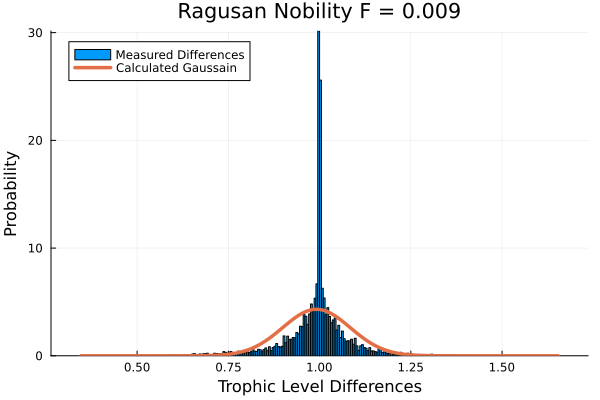

In [7]:
using Plots

hist = histogram(level_diffs, normed=true, xlabel= "Trophic Level Differences", ylabel= "Probability", label="Measured Differences")

x= LinRange(minimum(level_diffs), maximum(level_diffs), 1000)

z = 1 -F

variance = F - z^2 + 2*z -1
F_round= round(F,digits=3)


plot!(x, (sqrt(variance*2*pi))^-1*exp.(-(x .- z).^2/(2*variance)), lw= 3.5, label="Calculated Gaussain", legend=:topleft, title= "Ragusan Nobility F = $F_round")

#histogram!(fitness_diffs)

#savefig("Ragusuan_nobility_level_differece.pdf")




In [8]:

#Get birth date diffeence distrubtion and then corrleation of birth and level


## time_diff = collect(skipmissing(time_diff))
#using Dates

#time_diff= Dates.value.(time_diff)

#time_diff =convert(Array{Float64,1}, time_diff)

In [9]:
average= mean(time_diff)

variance = var(time_diff)


F_pred_1 = variance/( variance + average^2)

F_pred_round_1 = round(F_pred_1,digits=3)

0.12

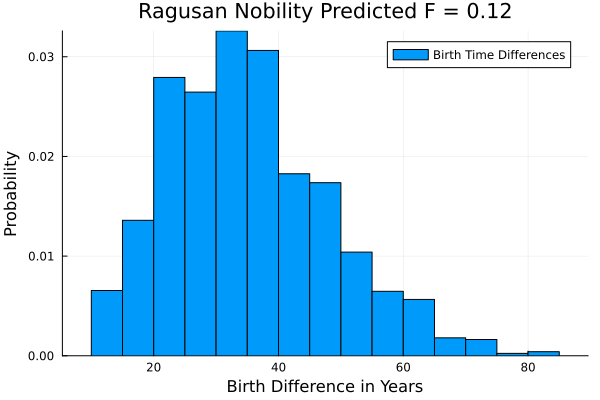

In [10]:
F_pred = variance/( variance + average^2)

F_pred_round = round(F_pred,digits=3)


histogram(time_diff, normed=true, xlabel="Birth Difference in Years", label="Birth Time Differences", ylabel="Probability", title= "Ragusan Nobility Predicted F = $F_pred_round_1")


#savefig("Time_differences_particle.pdf")
#savefig("Ragusuan_nobility_birth_time_differences.pdf")

Int64[]

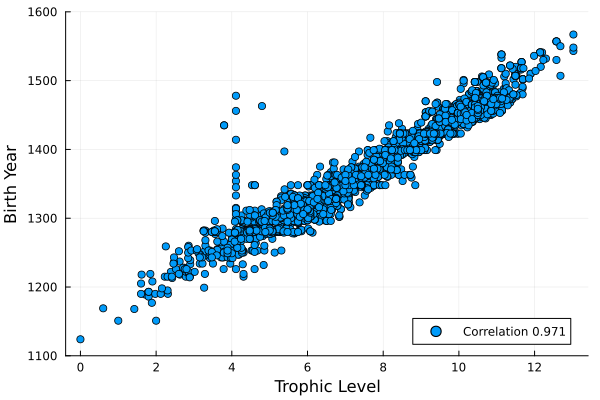

In [11]:



#Avoid filtering missing values as it moves around the indices
#plot(h, filter!(e->e>0,birth_plot) , seriestype=:scatter)

print(findall( x -> x ===missing , birth ))
imb_birth = indegree(g) - outdegree(g)
deleteat!(h, findall( x -> x ===missing , birth ))
deleteat!(imb_birth, findall( x -> x ===missing , birth ))
deleteat!(birth, findall( x -> x ===missing , birth ))
deleteat!(h, findall( x -> x <0 , birth ))
deleteat!(imb_birth, findall( x -> x <0 , birth ))
deleteat!(birth, findall( x -> x <0 , birth ))

correlation = round(cor(h,birth),digits=3)

plot(h, birth , seriestype=:scatter, ylim=(1100,1600), legend=:bottomright, xlabel="Trophic Level", ylabel="Birth Year", label=" Correlation $correlation")

#savefig("Ragusuan_nobility_birth_level_correlation.pdf")

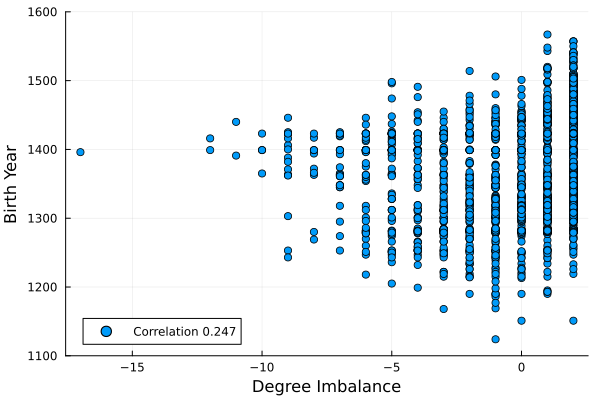

In [12]:
correlation = round(cor(imb_birth,birth),digits=3)

plot(imb_birth, birth , seriestype=:scatter, ylim=(1100,1600), legend=:bottomleft, xlabel="Degree Imbalance", ylabel="Birth Year", label=" Correlation $correlation")

#savefig("historical_network_degree_imbalnce_correlation.pdf")

In [37]:
println(size(death))
println(size(birth))

(3043,)
(3065,)


In [13]:
size(death_diff)

(3633,)

Int64[]

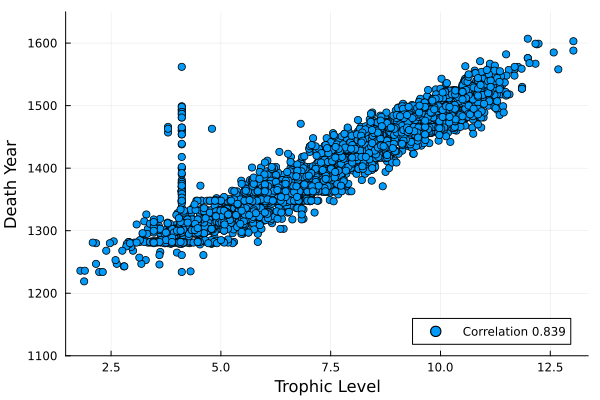

In [14]:
print(findall( x -> x ===missing , death ))
#print(death)
deleteat!(h_org, findall( x -> x ===missing , death ))
deleteat!(death, findall( x -> x ===missing , death ))
deleteat!(h_org, findall( x -> x <0 , death ))
deleteat!(death, findall( x -> x <0 , death ))

#print(death)
correlation = round(cor(h_org,death),digits=3)

plot(h_org, death , seriestype=:scatter, ylim=(1100,1650), legend=:bottomright, xlabel="Trophic Level", ylabel="Death Year",label=" Correlation $correlation")

#savefig("Ragusuan_nobility_death_level_correlation.pdf")

In [15]:
average= mean(death_diff)

variance = var(death_diff)


F_pred = variance/( variance + average^2)

F_pred_round = round(F_pred,digits=3)

0.48

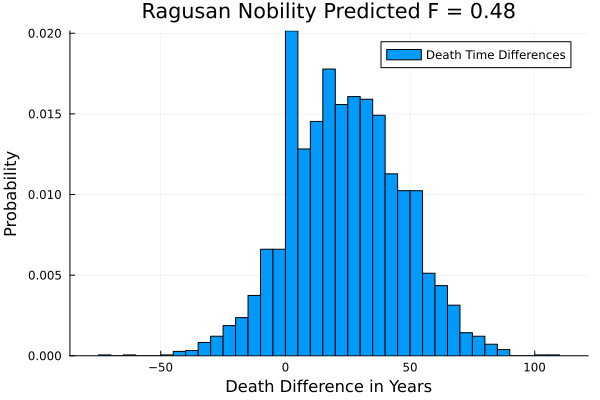

In [16]:


histogram(death_diff, normed=true, xlabel="Death Difference in Years", label="Death Time Differences", ylabel="Probability", title= "Ragusan Nobility Predicted F = $F_pred_round")


#savefig("Ragusuan_nobility_death_time_differences.pdf")

In [17]:

#many missing values 

In [18]:
using DelimitedFiles
using  MetaGraphs
#labels =readdlm("cit-HepPh-dates.txt")
N= nv(g)
labels =readlines("cit-HepTh-dates.txt")

E= ne(g)
N= nv(g)

ids= Array{Union{Nothing, String}}(nothing, N)
dates= Array{Union{Nothing, String}}(nothing, N)

for i in 2:N
    
    
#ids = (labels[:,1])[2:(N+1)]

#dates= (labels[:,2])[2:(N+1)]

ids[i],dates[i]=  split(labels[i])
    
end
G = MetaDiGraph(N)


LoadError: SystemError: opening file "cit-HepTh-dates.txt": No such file or directory

In [19]:
for v in 1:N
    
    set_prop!(G, v, :name, ids[v])
    set_prop!(G, v, :date, dates[v])
    end 

time_diffs= zeros(0)

#add edges
f=open("cit-HepTh.txt")

lines = readdlm(f)

label_1 = (lines[:,1])[5:(E+4)]
label_2 = (lines[:,2])[5:(E+4)]
set_indexing_prop!(G, :name)
print(ids)
for e in E
    
    
    add_edge!(G,G[label_1[e], :name], G[label_2[e], :name] )
    
    end 

LoadError: MethodError: no method matching set_prop!(::SimpleDiGraph{Int64}, ::Int64, ::Symbol, ::String7)

[0mClosest candidates are:
[0m  set_prop!([91m::AbstractMetaGraph[39m, ::Integer, ::Symbol, ::Any)
[0m[90m   @[39m [35mMetaGraphs[39m [90m~/.julia/packages/MetaGraphs/qq8oz/src/[39m[90m[4mMetaGraphs.jl:333[24m[39m
[0m  set_prop!([91m::AbstractMetaGraph[39m, [91m::Graphs.SimpleGraphs.SimpleEdge[39m, ::Symbol, ::Any)
[0m[90m   @[39m [35mMetaGraphs[39m [90m~/.julia/packages/MetaGraphs/qq8oz/src/[39m[90m[4mMetaGraphs.jl:340[24m[39m
[0m  set_prop!([91m::AbstractMetaGraph[39m, [91m::Symbol[39m, ::Any)
[0m[90m   @[39m [35mMetaGraphs[39m [90m~/.julia/packages/MetaGraphs/qq8oz/src/[39m[90m[4mMetaGraphs.jl:332[24m[39m
[0m  ...


In [20]:
unique(label_1)

LoadError: UndefVarError: `label_1` not defined

In [21]:
histogram(fitness_diffs, normed=true)

#savefig("absolute_vaule_counter_example.pdf")

LoadError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

In [22]:
usin

LoadError: UndefVarError: `usin` not defined

In [23]:
data = CSV.read("Ragusan.txt", DataFrame)

┌ Warning: thread = 1 warning: parsed expected 8 columns, but didn't reach end of line around data row: 1009. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:587
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1010. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1011. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1012. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1013. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1014. Filling remaining co

┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1051. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1052. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1053. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1054. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1055. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1056. Filling remaining columns with `missing`
└ @ CSV ~/.julia/pac

┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1095. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1096. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1097. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1098. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1099. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/aoJqo/src/file.jl:586
┌ Warning: thread = 1 warning: only found 8 / 9 columns around data row: 1100. Filling remaining columns with `missing`
└ @ CSV ~/.julia/pac

5999×9 DataFrame
  Row │ first               last      birth   death  gender    id       mother ⋯
      │ String?             String7?  Int64?  Int64  String3?  String7  String ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ Domagna de Babalio  missing       -1   1295  M         @I1@     missin ⋯
    2 │ Anna                missing       -1     -1  F         @I2@     missin
    3 │ Vita Babalio        missing     1270     -1  M         @I3@     @I2@
    4 │ Regina Dersie       missing     1281   1332  F         @I4@     @I38@
    5 │ Nicola Babalio      missing     1280   1323  M         @I6@     @I2@   ⋯
    6 │ Stane Babalio       missing     1295     -1  M         @I7@     @I2@
    7 │ Marcus Babalio      missing     1295     -1  M         @I8@     @I2@
    8 │ Rade                missing       -1     -1  F         @I9@     missin
    9 │ Clime Babalio       missing     1312   1319  M         @I10@    @I4@   ⋯
   10 │ Rassinus Babalio    missing     1312   1332  M         @I11@    @I4@
   11 │ Anna Babalio        missing     1312     -1  F         @I12@    @I4@
  ⋮   │         ⋮              ⋮        ⋮       ⋮       ⋮         ⋮        ⋮   ⋱
 5990 │ Michael Ragnina     missing     1255   1310  M         @I8042@  missin
 5991 │ Regina              missing       -1     -1  F         @I8043@  missin ⋯
 5992 │ Jacobus Ragnina     missing     1279   1282  M         @I8044@  @I8043
 5993 │ Vita Ragnina        missing     1295   1300  M         @I8045@  @I8043
 5994 │ Dobroslav Ranane    missing       -1   1281  M         @I8046@  missin
 5995 │ Pasqua Ragnina      missing       -1   1281  M         @I8047@  missin ⋯
 5996 │ Desa                missing       -1     -1  F         @I8048@  missin
 5997 │ Velisclava Ragnina  missing       -1   1320  F         @I8050@  missin
 5998 │ Nicholaus Crosio    missing     1270   1313  M         @I8051@  missin
 5999 │ Domagna Ragnina     missing     1208   1236  M         @I8052@  missin ⋯
                                                 3 columns and 5978 rows omitted

In [24]:
data[:, :id]

5999-element Vector{String7}:
 "@I1@"
 "@I2@"
 "@I3@"
 "@I4@"
 "@I6@"
 "@I7@"
 "@I8@"
 "@I9@"
 "@I10@"
 "@I11@"
 "@I12@"
 "@I13@"
 "@I14@"
 ⋮
 "@I8040@"
 "@I8041@"
 "@I8042@"
 "@I8043@"
 "@I8044@"
 "@I8045@"
 "@I8046@"
 "@I8047@"
 "@I8048@"
 "@I8050@"
 "@I8051@"
 "@I8052@"

In [25]:
count(ismissing, data[:, :id])


0

In [26]:
mother_id= data[:, :mother]

father_id= data[:, :father]

5999-element Vector{Union{Missing, String7}}:
 "@I1130@"
 missing
 "@I1@"
 "@I37@"
 "@I1@"
 "@I1@"
 "@I1@"
 missing
 "@I3@"
 "@I3@"
 "@I3@"
 "@I3@"
 missing
 ⋮
 "@I8035@"
 "@I8035@"
 "@I8046@"
 missing
 "@I8042@"
 "@I8042@"
 missing
 "@I8046@"
 missing
 "@I348@"
 "@I1320@"
 missing

In [27]:
5999 -count(ismissing, mother_id)

4360

In [28]:
5999 -count(ismissing, father_id)

4956

In [29]:
5999*2  -count(ismissing, father_id) -count(ismissing, mother_id)

9316

In [30]:
length(unique(data[:, :id]))



5999

In [31]:
isempty(mother_id)


for i in 1:5999
    
    #if mother_id[i]!=missing
    println(mother_id[i])
  
    
end

missing
missing
@I2@
@I38@
@I2@
@I2@
@I2@
missing
@I4@
@I4@
@I4@
@I4@
missing
missing
@I15@
missing
@I15@
@I15@
@I345@
@I9@
@I9@
@I9@
@I9@
@I9@
missing
@I26@
missing
@I26@
@I28@
@I28@
@I28@
missing
@I28@
@I33@
missing
@I40@
missing
@I42@
missing
@I44@
missing
@I46@
missing
missing
missing
@I44@
@I40@
missing
@I40@
@I49@
@I49@
@I2584@
@I49@
missing
@I6449@
@I49@
missing
@I49@
missing
@I7259@
@I6627@
@I7259@
@I7259@
@I7259@
@I7259@
missing
@I59@
@I59@
@I59@
@I61@
@I5591@
@I63@
@I4535@
@I63@
@I65@
missing
@I65@
missing
@I65@
missing
@I85@
missing
@I5335@
@I5335@
missing
@I92@
missing
@I5335@
@I2594@
@I5335@
@I5335@
@I5299@
@I101@
@I5778@
@I5778@
@I5335@
@I71@
missing
missing
missing
@I71@
@I71@
@I71@
missing
missing
@I71@
missing
@I71@
@I116@
@I116@
missing
missing
@I116@
missing
@I2554@
@I1882@
missing
@I80@
@I80@
@I129@
@I649@
missing
@I138@
missing
missing
@I138@
missing
@I140@
@I140@
@I1848@
@I140@
missing
@I140@
missing
@I140@
missing
missing
@I150@
@I150@
missing
@I150@
missing
@I15

@I3231@
@I1631@
missing
@I1634@
@I1155@
@I3949@
@I2635@
@I2476@
@I988@
@I4124@
@I5714@
missing
@I4542@
missing
missing
@I7234@
@I1502@
missing
@I1669@
missing
@I1674@
@I1453@
@I1453@
@I1453@
@I1453@
missing
missing
missing
@I1685@
missing
missing
@I5591@
missing
missing
missing
@I5591@
@I1691@
missing
@I1691@
@I935@
@I1693@
missing
missing
missing
missing
missing
@I1756@
@I1716@
@I1716@
@I7450@
@I3139@
@I1716@
@I1716@
@I1932@
@I1716@
@I1716@
@I7739@
@I1716@
@I3150@
@I1203@
@I1711@
@I5982@
@I1711@
@I1944@
@I1711@
@I4112@
@I1711@
@I1711@
@I1711@
@I1741@
@I1741@
@I2087@
@I2087@
@I2087@
@I2087@
@I1718@
@I7014@
@I1718@
@I3096@
missing
@I1017@
@I1017@
@I3636@
@I5268@
@I1017@
@I1017@
@I4698@
@I2158@
@I782@
@I2158@
@I7918@
@I2158@
@I2158@
@I6310@
@I2158@
@I5036@
@I2158@
@I1769@
@I1769@
@I1769@
@I1952@
@I1769@
@I1769@
missing
@I1786@
@I1786@
@I6375@
@I1778@
@I1763@
@I4628@
@I1764@
@I3344@
@I1764@
@I4164@
@I1764@
missing
@I1756@
missing
missing
@I1803@
missing
@I1803@
missing
@I1803@
missing
@I1

@I3927@
missing
@I3927@
@I860@
missing
@I3927@
missing
@I3927@
@I6033@
@I3927@
missing
@I873@
@I873@
@I5384@
@I3936@
missing
@I4613@
@I935@
@I3220@
@I3954@
@I3954@
@I3955@
@I3956@
@I3956@
@I3139@
@I3956@
@I1121@
@I3956@
@I1121@
@I3956@
@I7724@
missing
@I7724@
@I4628@
@I1945@
@I4628@
@I4628@
@I3259@
@I2025@
@I3259@
@I3259@
@I7922@
@I3997@
@I3997@
@I4198@
@I3997@
@I510@
@I510@
@I510@
@I3787@
@I1791@
@I1791@
@I1791@
@I1791@
@I1791@
@I3809@
@I3809@
@I3809@
@I7458@
@I5260@
@I2242@
missing
@I2242@
@I3831@
@I2242@
@I2242@
@I805@
@I2242@
@I2242@
@I2242@
@I2043@
@I6203@
@I3220@
@I5982@
@I3220@
@I3220@
@I2787@
@I3220@
@I4056@
@I4056@
missing
@I2255@
@I7763@
@I5152@
@I7763@
@I7763@
@I7763@
@I7763@
@I7763@
@I7814@
@I3915@
@I7814@
@I1043@
@I2787@
@I4111@
@I4743@
@I5754@
@I1643@
@I4112@
@I2151@
@I4112@
@I5709@
@I4112@
@I1203@
@I4112@
@I4112@
@I4112@
@I4112@
missing
@I4127@
@I2153@
missing
@I2153@
@I7746@
missing
@I834@
@I4146@
@I4146@
@I4146@
@I4146@
missing
@I4100@
@I5774@
@I7922@
@I4100@
@I4100@
@

@I6691@
@I6691@
@I6691@
@I6679@
missing
@I6679@
@I2787@
@I6681@
@I5219@
@I6700@
@I6681@
missing
@I6703@
@I6703@
missing
missing
missing
missing
@I6703@
@I6703@
@I6681@
@I6681@
@I6681@
missing
missing
@I6716@
@I6716@
@I6716@
@I6681@
@I6681@
@I6681@
missing
@I2584@
@I6724@
@I3169@
missing
@I3169@
@I3169@
@I6847@
@I6733@
@I6733@
@I6733@
@I1449@
@I1021@
@I4380@
missing
missing
missing
@I6753@
@I6753@
@I6753@
missing
missing
missing
missing
missing
missing
@I209@
@I209@
@I209@
@I209@
@I6774@
missing
@I6771@
missing
missing
@I6774@
missing
@I6774@
missing
missing
@I6779@
@I6779@
@I1385@
missing
missing
missing
@I6791@
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
@I6808@
@I7347@
@I6808@
missing
@I6813@
@I6809@
@I6809@
@I3532@
@I6841@
missing
@I6819@
missing
@I6819@
@I6821@
@I6821@
@I6821@
@I6821@
missing
missing
@I6559@
missing
missing
@I5500@
@I6286@
missing
@I6841@
@I6841@
@I6841@
missing
@I6845@
missing
@I3484@
@I68

In [32]:
data[1009,:]

DataFrameRow
  Row │ first        last      birth    death  gender    id       mother    fa ⋯
      │ String?      String7?  Int64?   Int64  String3?  String7  String7?  St ⋯
──────┼─────────────────────────────────────────────────────────────────────────
 1009 │ Vela (Biela   Bella)   missing     -1  -1        F        @I1138@   mi ⋯
                                                               2 columns omitted

In [33]:
data[1010,"id"]

"@I1139@"

In [34]:
data[1009,"mother"]

"@I1138@"

In [35]:
data[1009,"id"]

"F"